In [47]:
%%time
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 1 ms


In [57]:
train_iris = pd.read_csv('data/train_iris.csv',index_col=0)
test_iris = pd.read_csv('data/test_iris.csv',index_col=0)

In [58]:
x_train_iris = train_iris.drop(['species'],axis=1)
y_train_iris = train_iris.species
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')

In [59]:
clf.fit(x_train_iris,y_train_iris)
clf.score(x_train_iris,y_train_iris)

1.0

In [60]:
x_test_iris = test_iris.drop(['species'],axis=1)
y_test_iris = test_iris.species

In [61]:
clf.score(x_test_iris,y_test_iris)

0.92

In [62]:
rs = np.random.seed(0)  #makes the random numbers predictable

max_depth_range = range(1,100)
score_data = pd.DataFrame()
for d in max_depth_range:
    clfd = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d,random_state=rs)
    
    clfd.fit(x_train_iris,y_train_iris)
    
    trn = clfd.score(x_train_iris,y_train_iris)    
    tst = clfd.score(x_test_iris,y_test_iris)

    df = pd.DataFrame({'depth':[d],
                       'train':[trn],
                       'test':[tst]})
    score_data = score_data.append(df)   

<AxesSubplot:xlabel='depth', ylabel='score'>

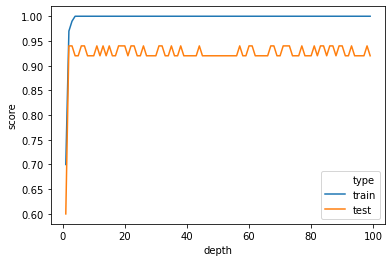

In [63]:
score_data_long = pd.melt(score_data,
                          id_vars=['depth'],
                          value_vars=['train','test'],
                          var_name='type',value_name='score')
sns.lineplot(x='depth', y='score',hue='type',data=score_data_long)